In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
import numpy as np
from sklearn.datasets import load_boston, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

2024-05-02 14:55:41.153618: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-02 14:55:42.078830: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-05-02 14:55:42.078926: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-05-02 14:55:46.141554: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-

Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 0.2971 - accuracy: 0.9135
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1445 - accuracy: 0.9574
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1077 - accuracy: 0.9686
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0895 - accuracy: 0.9727
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.0738 - accuracy: 0.9757


[0.07381758093833923, 0.9757000207901001]

170498071/170498071 [==============================] - 9s 0us/step


2024-05-02 15:02:33.349512: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
1562/1563 [============================>.] - ETA: 0s - loss: 1.5379 - accuracy: 0.4389

2024-05-02 15:04:20.345631: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


1563/1563 [==============================] - 112s 70ms/step - loss: 1.5378 - accuracy: 0.4390 - val_loss: 1.3049 - val_accuracy: 0.5311
Epoch 2/10
1563/1563 [==============================] - 90s 57ms/step - loss: 1.1898 - accuracy: 0.5763 - val_loss: 1.1161 - val_accuracy: 0.6014
Epoch 3/10
1563/1563 [==============================] - 95s 61ms/step - loss: 1.0459 - accuracy: 0.6304 - val_loss: 1.0230 - val_accuracy: 0.6331
Epoch 4/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.9421 - accuracy: 0.6668 - val_loss: 0.9606 - val_accuracy: 0.6548
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8630 - accuracy: 0.6951 - val_loss: 0.9366 - val_accuracy: 0.6733
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8008 - accuracy: 0.7176 - val_loss: 0.9368 - val_accuracy: 0.6785
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7513 - accuracy: 0.7333 - val_loss: 0.8705 - val_accur

2024-05-02 15:15:06.697581: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


313/313 - 3s - loss: 0.8731 - accuracy: 0.7058 - 3s/epoch - 11ms/step

Test accuracy: 0.7057999968528748


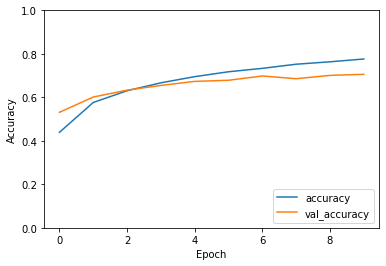

In [10]:
# Load and preprocess CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
